In [38]:
import numpy as np
import sklearn.datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
X,y = sklearn.datasets.make_moons(200,noise=0.2)

In [39]:
X[0:10]

array([[ 1.72603774, -0.05760324],
       [-0.82038538,  0.4412698 ],
       [-1.01242688,  0.21695414],
       [-0.63144252,  0.47954672],
       [ 0.12098606,  1.23225013],
       [ 0.61782879, -0.24123135],
       [ 0.10015288,  0.04175871],
       [ 0.89853309, -0.23520562],
       [-0.02456969,  0.54918303],
       [ 0.46061409,  0.41794607]])

In [40]:
X.shape

(200, 2)

In [41]:
y[0:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [42]:
y.shape

(200,)

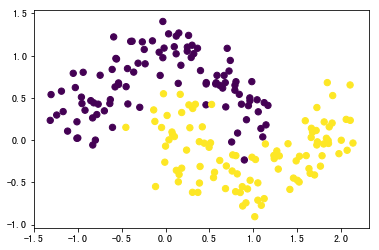

In [43]:
plt.scatter(X[:,0],X[:,1],s=40,c=y)

In [44]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)
print(y.shape)

torch.Size([200])


In [45]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        return x
             
    def predict(self,x):
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [46]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [48]:
print(accuracy_score(model.predict(X),y))

0.985


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [49]:
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

In [50]:
def plot_decision_boundary(pred_func,X,y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max()+.5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max()+.5
    h = 0.01
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


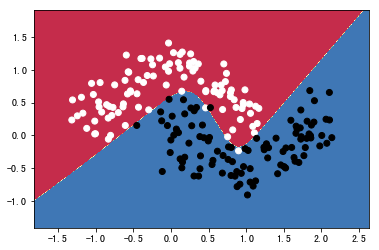

In [51]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())